# Fit extracted line profiles

In [1]:
import os
import re
import numpy as np
from skimage import measure
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
def lorentzian(x, a, b, c, d):
    """Definition of Lorentzian fitting function."""
    return a/(((x-b)/(0.5*c))**2+1)+d

def lozfit(xdata, ydata, widtol=200):
    """Perform the fitting and return parameters of interest."""
    try:
        popt, pcov = curve_fit(lorentzian, xdata, ydata, bounds=([0, xdata[-1]/2-100, 0, 0], [max(ydata)*1.5, xdata[-1]/2+100, widtol, max(ydata)/2]))
    except:
        return (0,0,0,0)
    fwhm = popt[2]
    # Calculate r-sq value
    residuals = ydata - lorentzian(xdata, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    r_sq = 1 - (ss_res/ss_tot)
    return fwhm, r_sq, popt, pcov

['example_data_tubulin_hela\\line_profiles\\210818_slide2_area002', 'example_data_tubulin_hela\\line_profiles\\210818_slide2_area004', 'example_data_tubulin_hela\\line_profiles\\210818_slide2_area005', 'example_data_tubulin_hela\\line_profiles\\210818_slide2_area008', 'example_data_tubulin_hela\\line_profiles\\210818_slide4_area001', 'example_data_tubulin_hela\\line_profiles\\210819_slide1_area001', 'example_data_tubulin_hela\\line_profiles\\210819_slide1_area002', 'example_data_tubulin_hela\\line_profiles\\210819_slide1_area003']

5

FWHM: 50.6 nm, R^2: 0.91
FWHM: 40.9 nm, R^2: 0.78
FWHM: 62.8 nm, R^2: 0.94
FWHM: 34.1 nm, R^2: 0.91
FWHM: 40.1 nm, R^2: 0.83

7

FWHM: 53.6 nm, R^2: 0.92
FWHM: 41.1 nm, R^2: 0.91
FWHM: 36.0 nm, R^2: 0.91
FWHM: 48.1 nm, R^2: 0.88
FWHM: 39.8 nm, R^2: 0.85
FWHM: 33.2 nm, R^2: 0.83
FWHM: 43.0 nm, R^2: 0.92

10

FWHM: 72.7 nm, R^2: 0.91
FWHM: 45.1 nm, R^2: 0.89
FWHM: 43.8 nm, R^2: 0.92
FWHM: 42.7 nm, R^2: 0.90
FWHM: 38.7 nm, R^2: 0.91
FWHM: 49.9 nm, R^2: 0.97


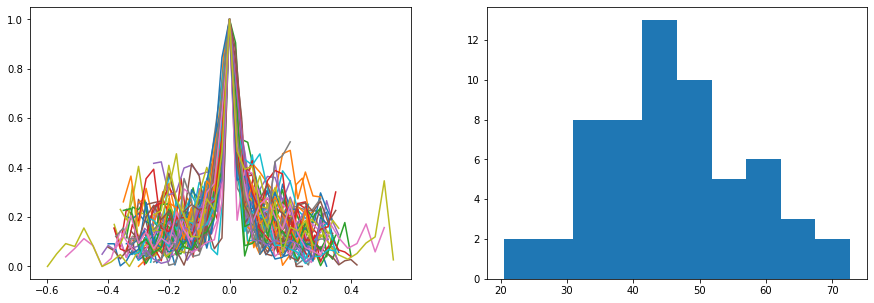

In [5]:
# read files
folder_top = 'example_data_tubulin_hela\\line_profiles'
dirs_top = []
for item in os.listdir(folder_top):
    if os.path.isdir(os.path.join(folder_top, item)):
        dirs_top.append(os.path.join(folder_top, item))
print(dirs_top)

save = False

fwhms = []

fig1, axs = plt.subplots(1,2, figsize=(15,5))
for folder in dirs_top:
    
    if ('210824' in folder and 'slide1' in folder) or ('210824' in folder and 'slide2' in folder) or ('210818' in folder and 'slide4' in folder):
        pxs = 0.030
    elif ('210819' in folder and 'slide1' in folder):
        pxs = 0.025
    elif ('210818' in folder and 'slide2' in folder):
        pxs = 0.02
    else:
        pxs = 1
        
    lineproffiles = []

    for file in os.listdir(folder):
        if re.search('.csv', file):
            lineproffiles.append(os.path.join(folder, file))

    print(''), print(len(lineproffiles)), print('')

    for lineproffile in lineproffiles:
        lineprof = np.loadtxt(lineproffile, delimiter=',', skiprows=1)
        line_x = lineprof[:,0]*pxs
        line_y = lineprof[:,1]
        line_x_plot = line_x - line_x[np.argmax(line_y)]
        fwhm, r_sq, popt, _ = lozfit(line_x, line_y, widtol=0.15)
        fwhms.append(fwhm)
        print(f'FWHM: {fwhm*1000:.1f} nm, R^2: {r_sq:.2f}')
        axs[0].plot(line_x_plot, line_y/np.max(line_y))
    
print(''), print(f'Mean FWHM: {np.mean(fwhms)*1000:.1f} +/- {np.std(fwhms)*1000:.2f} nm, N = {len(fwhms)}'), print('')

fwhms_hist = [fwhm*1000 for fwhm in fwhms]
axs[1].hist(fwhms_hist)
#axs[1].set_xlim([40, 90])

if save:
    fig2 = plt.figure(figsize=(4,4))
    plt.hist(fwhms_hist, facecolor='gray', edgecolor='black')
    plt.xlabel('FWHM (nm)')
    plt.ylabel('N')
    plt.xlim([0, 100])
    
    savefolder = 'example_data_tubulin_hela'
    if 'hela' in folder_top:
        savename = 'resolution-tubulin-hela.svg'
    fig2.savefig(os.path.join(savefolder, savename))
    